In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

# Load Women's NCAA Historical Data

In [2]:
dir_data = '/jupyter/data'
file_tourney_seed = 'WNCAATourneySeeds.csv'
file_tourney_history = 'WNCAATourneyDetailedResults.csv'
file_regular_history = 'WRegularSeasonDetailedResults.csv'
file_submission = 'WSampleSubmissionStage2.csv'
file_teams = 'WTeams.csv'

df_submission = pd.read_csv('{}/{}'.format(
    dir_data,
    file_submission
))

df_teams = pd.read_csv('{}/{}'.format(
    dir_data,
    file_teams
))

df_tourney_seeds = pd.read_csv('{}/{}'.format(
    dir_data,
    file_tourney_seed
))

df_tourney_history = pd.read_csv('{}/{}'.format(
    dir_data, 
    file_tourney_history
))

df_regular_history = pd.read_csv('{}/{}'.format(
    dir_data,
    file_regular_history
))

display(df_tourney_seeds.head())
display(df_tourney_history.head())
display(df_regular_history.head())
display(df_submission.head())
display(df_regular_history.head())

,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,...,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,...,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,...,15,3,8,10,21,4,16,6,4,20
3,2010,138,3199,75,3256,61,H,0,25,63,...,20,17,22,16,21,13,16,5,4,24
4,2010,138,3207,62,3265,42,N,0,24,68,...,26,11,17,16,22,9,10,3,4,12


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14


,ID,Pred
0,2019_3101_3113,0.5000
1,2019_3101_3114,0.5000
2,2019_3101_3120,0.5000
3,2019_3101_3124,0.5000
4,2019_3101_3125,0.5000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14


In [3]:
display(df_tourney_history.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [4]:
display(df_regular_history.columns)

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

# Transform detailed box score data
- Currently, no use for NumOT column

In [5]:
# Merge tournament games with regular season games
df_regular_history['Is_Tournament_Match'] = 0
df_tourney_history['Is_Tournament_Match'] = 1


df_regular_history = pd.concat([
    df_regular_history,
    df_tourney_history
])

# Each row has a winning team and a losing team. We need to treat each match up as two
# seperate matches as a team versus an opponent team.
df_regular_winning_teams = df_regular_history[[
    'Season', 
    'DayNum', 
    'WTeamID',
    'LTeamID',
    'WScore',
    'LScore',
    'WLoc',
    'WFGM', 
    'WFGA', 
    'WFGM3', 
    'WFGA3', 
    'WFTM', 
    'WFTA', 
    'WOR', 
    'WDR',
    'WAst', 
    'WTO', 
    'WStl', 
    'WBlk',
    'WPF',
    'LFGM', 
    'LFGA', 
    'LFGM3', 
    'LFGA3',
    'LFTM', 
    'LFTA', 
    'LOR', 
    'LDR', 
    'LAst', 
    'LTO', 
    'LStl', 
    'LBlk', 
    'LPF',
    'Is_Tournament_Match'
]].rename(columns={
    'WTeamID': 'TeamID',
    'LTeamID': 'TeamID_OPP',
    'WScore': 'PTS',
    'LScore': 'PTS_OPP',
    'WLoc': 'Location',
    'WFGM': 'FGM',
    'LFGM': 'FGM_OPP',
    'WFGA': 'FGA',
    'LFGA': 'FGA_OPP',
    'WFGM3': 'FG3M',
    'LFGM3': 'FG3M_OPP',
    'WFGA3': 'FG3A',
    'LFGA3': 'FG3A_OPP',
    'WFTM': 'FTM',
    'LFTM': 'FTM_OPP',
    'WFTA': 'FTA',
    'LFTA': 'FTA_OPP',
    'WFTM': 'FTM',
    'LFTM': 'FTM_OPP',
    'WOR': 'OREB',
    'LOR': 'OREB_OPP',
    'WDR': 'DREB',
    'LDR': 'DREB_OPP',
    'WAst': 'AST',
    'LAst': 'AST_OPP',
    'WTO': 'TO',
    'LTO': 'TO_OPP',
    'WStl': 'STL',
    'LStl': 'STL_OPP',
    'WBlk': 'BLK',
    'LBlk': 'BLK_OPP',
    'WPF': 'PF',
    'LPF': 'PF_OPP',
})

df_regular_losing_teams = df_regular_history[[
    'Season', 
    'DayNum', 
    'WTeamID',
    'LTeamID',
    'WScore',
    'LScore',
    'WLoc',
    'WFGM', 
    'WFGA', 
    'WFGM3', 
    'WFGA3', 
    'WFTM', 
    'WFTA', 
    'WOR', 
    'WDR',
    'WAst', 
    'WTO', 
    'WStl', 
    'WBlk',
    'WPF',
    'LFGM', 
    'LFGA', 
    'LFGM3', 
    'LFGA3',
    'LFTM', 
    'LFTA', 
    'LOR', 
    'LDR', 
    'LAst', 
    'LTO', 
    'LStl', 
    'LBlk', 
    'LPF',
    'Is_Tournament_Match'
]].rename(columns={
    'LTeamID': 'TeamID',
    'WTeamID': 'TeamID_OPP',
    'LScore': 'PTS',
    'WScore': 'PTS_OPP',
    'LFGM': 'FGM',
    'WFGM': 'FGM_OPP',
    'LFGA': 'FGA',
    'WFGA': 'FGA_OPP',
    'LFGM3': 'FG3M',
    'WFGM3': 'FG3M_OPP',
    'LFGA3': 'FG3A',
    'WFGA3': 'FG3A_OPP',
    'LFTM': 'FTM',
    'WFTM': 'FTM_OPP',
    'LFTA': 'FTA',
    'WFTA': 'FTA_OPP',
    'LFTM': 'FTM',
    'WFTM': 'FTM_OPP',
    'LOR': 'OREB',
    'WOR': 'OREB_OPP',
    'LDR': 'DREB',
    'WDR': 'DREB_OPP',
    'LAst': 'AST',
    'WAst': 'AST_OPP',
    'LTO': 'TO',
    'WTO': 'TO_OPP',
    'LStl': 'STL',
    'WStl': 'STL_OPP',
    'LBlk': 'BLK',
    'WBlk': 'BLK_OPP',
    'LPF': 'PF',
    'WPF': 'PF_OPP',
})

# Derive Losing team's playing location since 'WLoc' is relative to winning team
df_regular_losing_teams['Location'] = df_regular_losing_teams.apply(
    lambda x: 'A' if x['WLoc'] == 'H' else 'H' if x['WLoc'] == 'A' else 'N',
    axis=1
)

df_regular = pd.concat([
    df_regular_winning_teams, 
    df_regular_losing_teams
])[[
    'Season',
    'DayNum',
    'Location',
    'TeamID',
    'PTS',
    'FGM', 'FGA',
    'FG3M', 'FG3A',
    'FTM', 'FTA',
    'AST',
    'OREB', 'DREB',
    'STL', 'BLK',
    'TO',
    'PF',
    'TeamID_OPP',
    'PTS_OPP',
    'FGM_OPP', 'FGA_OPP',
    'FG3M_OPP', 'FG3A_OPP',
    'FTM_OPP', 'FTA_OPP',
    'AST_OPP',
    'OREB_OPP', 'DREB_OPP',
    'STL_OPP', 'BLK_OPP',
    'TO_OPP',
    'PF_OPP',
    'Is_Tournament_Match'
]]

# Other derived stats
# 1. 2 pointers
df_regular['FG2M'] = df_regular['FGM'] - df_regular['FG3M']
df_regular['FG2A'] = df_regular['FGA'] - df_regular['FG3A']
df_regular['FG2M_OPP'] = df_regular['FGM_OPP'] - df_regular['FG3M_OPP']
df_regular['FG2A_OPP'] = df_regular['FGA_OPP'] - df_regular['FG3A_OPP']

# 2. PTS spread
df_regular['PTS_SPREAD'] = df_regular['PTS'] - df_regular['PTS_OPP']

# 3. 2s, 3s and FT Percentages
df_regular['FG2_PCT'] = df_regular['FG2M'] / df_regular['FG2A']
df_regular['FG3_PCT'] = df_regular['FG3M'] / df_regular['FG3A']
df_regular['FG_PCT'] = df_regular['FGM'] / df_regular['FGA']
df_regular['FT_PCT'] = df_regular['FTM'] / df_regular['FTA']
df_regular['FG2_PCT_OPP'] = df_regular['FG2M_OPP'] / df_regular['FG2A_OPP']
df_regular['FG3_PCT_OPP'] = df_regular['FG3M_OPP'] / df_regular['FG3A_OPP']
df_regular['FG_PCT_OPP'] = df_regular['FGM_OPP'] / df_regular['FGA_OPP']
df_regular['FT_PCT_OPP'] = df_regular['FTM_OPP'] / df_regular['FTA_OPP']

# 4. One-hot encode Location as indicators
df_regular['IND_LOCATION_HOME'] = df_regular.apply(
    lambda x: 1 if x['Location'] == 'H' else 0,
    axis=1
)
df_regular['IND_LOCATION_NEUTRAL'] = df_regular.apply(
    lambda x: 1 if x['Location'] == 'N' else 0,
    axis=1
)
df_regular['IND_LOCATION_AWAY'] = df_regular.apply(
    lambda x: 1 if x['Location'] == 'A' else 0,
    axis=1
)

# 5. Opposition's location relative to current team's location
df_regular['Location_OPP'] = df_regular.apply(
    lambda x: 'H' if x['Location'] == 'A' else 'A' if x['Location'] == 'H' else 'N',
    axis=1
)

# 6. Tournament-specific fields such as seed
df_regular = df_regular.merge(
    df_tourney_seeds,
    on=['TeamID', 'Season'],
    how='left'
).merge(
    df_tourney_seeds.rename(
        columns={
            'TeamID': 'TeamID_OPP',
            'Seed': 'Seed_OPP'
    }),
    on=['TeamID_OPP', 'Season'],
    how='left'
)

df_regular['Seed'] = df_regular['Seed'].apply(lambda x: 0 if x is np.NaN else int(x[1:]))
df_regular['Seed_OPP'] = df_regular['Seed_OPP'].apply(lambda x: 0 if x is np.NaN else int(x[1:]))

display(df_regular.head())

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:162: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Season,DayNum,Location,TeamID,PTS,FGM,FGA,FG3M,FG3A,FTM,...,FG2_PCT_OPP,FG3_PCT_OPP,FG_PCT_OPP,FT_PCT_OPP,IND_LOCATION_HOME,IND_LOCATION_NEUTRAL,IND_LOCATION_AWAY,Location_OPP,Seed,Seed_OPP
0,2010,11,H,3103,63,23,54,5,9,12,...,0.4146,0.2308,0.3704,0.6000,1,0,0,A,0,0
1,2010,11,N,3104,73,26,62,5,12,16,...,0.5000,0.1905,0.3968,0.5185,0,1,0,N,0,0
2,2010,11,A,3110,71,29,62,6,15,7,...,0.3864,0.1429,0.3276,0.8261,0,0,1,H,0,0
3,2010,11,A,3111,63,27,52,4,11,5,...,0.2500,0.2308,0.2432,0.6400,0,0,1,H,0,0
4,2010,11,H,3119,74,30,74,7,20,7,...,0.2807,0.5294,0.3378,0.5238,1,0,0,A,0,0


# Build and evaluate regression model
- Each team usually plays 28-32 games in a regular season
- Historical data spans 2010-2018

In [6]:
def evaluate(df, trace, draw_dist=True, spread_predicted=False):    
    df['PREDICTED_WIN'] = df.apply(
        lambda x: 1 if x['PREDICTED_WIN_PROBA'] >= 0.5 else 0, 
        axis=1
    )
    df['ACTUAL_WIN'] = df.apply(
        lambda x: 1 if x['PTS'] >= x['PTS_OPP'] else 0, 
        axis=1
    )
    df['PREDICTED_CORRECT'] = df.apply(
        lambda x: 1 if x['PREDICTED_WIN'] == x['ACTUAL_WIN'] else 0, 
        axis=1
    )

    df_regular = df.loc[
        lambda x: x['Is_Tournament_Match'] == 0
    ]
    df_tourney = df.loc[
        lambda x: x['Is_Tournament_Match'] == 1
    ]
    
    for df in [df_regular, df_tourney]:
        n_matches = df.shape[0]
        
        print(
            '----------Regular Season----------' if df is df_regular else \
            '\n\n\n----------NCAA Tournament----------' 
        )
    
        if spread_predicted:
            display(
                df[[
                    'TeamID',
                    'TeamID_OPP',
                    'PTS',
                    'PTS_OPP',
                    'PREDICTED_WIN_PROBA',
                    'PREDICTED_WIN',
                    'ACTUAL_WIN',
                    'PREDICTED_CORRECT',
                    'PREDICTED_SPREAD',
                    'PTS_SPREAD',
                    'DELTA_SPREAD'
            ]].head(20))
        else:
            display(
                df[[
                    'TeamID',
                    'TeamID_OPP',
                    'PTS',
                    'PTS_OPP',
                    'PREDICTED_WIN_PROBA',
                    'PREDICTED_WIN',
                    'ACTUAL_WIN',
                    'PREDICTED_CORRECT',
                    'PTS_SPREAD'
            ]].head(20))

        model_log_loss = -np.sum(
            (df['ACTUAL_WIN'] * np.log(df['PREDICTED_WIN_PROBA'])) + \
            ((1 - df['ACTUAL_WIN']) * np.log(1 - df['PREDICTED_WIN_PROBA']))
        ) / n_matches 

        n_matches_predicted = df.loc[
            lambda x: x['PREDICTED_CORRECT'] == 1
        ].shape[0]

        print('Model Log Loss: [{:,.2f}]'.format(model_log_loss))
        if spread_predicted:
            print('Sum of Predicted - Actual Spread: [{:,.2f}]'.format(
                (df['DELTA_SPREAD']).abs().sum()
            ))
        print('% Team Won Correctly Predicted: [{:,}] / [{:,}] = [{:,.2f}%]'.format(
            n_matches_predicted,
            n_matches,
            n_matches_predicted / n_matches * 100
        ))

        if draw_dist:
            fig,ax = plt.subplots(1,1,figsize=(16,5))
            sns.distplot(df['PREDICTED_WIN_PROBA'], ax=ax)
            ax.set_xlim(0, 1)

            if spread_predicted:
                fig,axes = plt.subplots(2,1,figsize=(16,5))
                axes = np.ravel(axes)

                sns.distplot(df['PREDICTED_SPREAD'], ax=axes[0])
                axes[0].set_xlim(-25, 25)

                sns.distplot(df['DELTA_SPREAD'], ax=axes[1])
                axes[1].set_xlim(-80, 80)

def get_train_test_data(df, target_year, num_years_train, num_years_test):
    df_test = df.loc[
        lambda x: x['Season'] > (target_year - num_years_test)
    ]

    df_train = df.loc[
        lambda x: (x['Season'] > (target_year - num_years_train - num_years_test)) &
            (x['Season'] <= (target_year - num_years_test))
    ]

    return df_train, df_test

df_train, df_test = get_train_test_data(df_regular, 2018, 3, 1)
teams, ixs_team = np.unique(df_train['TeamID'], return_inverse=True)
teams_opp, ixs_team_opp = np.unique(df_train['TeamID_OPP'], return_inverse=True)
n_teams = teams.shape[0]
n_trace = 5000

# Linear Regression Model to predict PTS_SPREAD
- FG attempts as team-level Gammas vs Normals (or Poissons for counts) to allow using loc/scale parameters instead of mu/sd 
- FG percentages as team-level Betas vs Bounded (0,1) Normals to allow using loc/scale parameters instead of mu/sd
- League-level Half-Cauchy error term to soak up some variance 
- Assume team's scoring propensity is normally-distributed and treat as observed variable
- Assume points spread between two teams is normally-distributed and treat as observed variable

Average Loss = 4.8805e+05: 100%|██████████| 20000/20000 [01:50<00:00, 181.32it/s]
Finished [100%]: Average Loss = 4.8802e+05


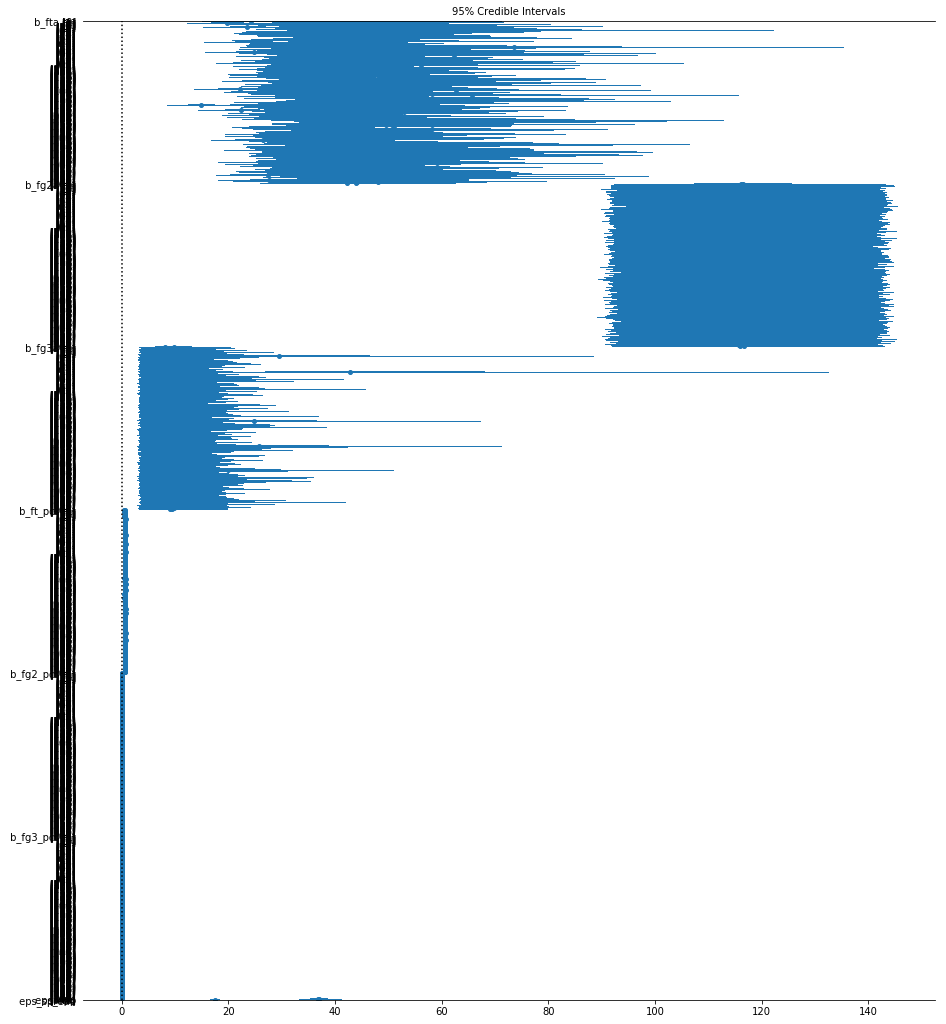

In [7]:
df = df_train[
    lambda x: (~pd.isnull(x['FT_PCT'])) & (~pd.isnull(x['FG3_PCT'])) 
]
teams, ixs_team = np.unique(df['TeamID'], return_inverse=True)
teams_opp, ixs_team_opp = np.unique(df['TeamID_OPP'], return_inverse=True)

n_iterations = 20000
n_trace = 5000
with pm.Model() as model_pts_aggregate:
    beta_fta = pm.Gamma('b_fta', alpha=12.66, beta=2.07, shape=n_teams)
    beta_fg2a = pm.Gamma('b_fg2a', alpha=97.82, beta=0.84, shape=n_teams)
    beta_fg3a = pm.Gamma('b_fg3a', alpha=14.02, beta=1.75, shape=n_teams)   
    
    beta_ft_pct = pm.Beta('b_ft_pct', alpha=7.58, beta=38.23, shape=n_teams)
    beta_fg2_pct = pm.Beta('b_fg2_pct', alpha=97.88, beta=13506450.08, shape=n_teams)
    beta_fg3_pct = pm.Beta('b_fg3_pct', alpha=13.51, beta=2144.68, shape=n_teams)
    
    y_hat = (beta_fta[ixs_team] * beta_ft_pct[ixs_team]) + \
        (beta_fg2a[ixs_team] * beta_fg2_pct[ixs_team] * 2) + \
        (beta_fg3a[ixs_team] * beta_fg3_pct[ixs_team] * 3)
    
    eps = pm.HalfCauchy('eps', 1)
    y_like = pm.Normal('y_like', mu=y_hat, sd=eps, observed=df['PTS'])
    
    y_hat_opp = (beta_fta[ixs_team_opp] * beta_ft_pct[ixs_team_opp]) + \
        (beta_fg2a[ixs_team_opp] * beta_fg2_pct[ixs_team_opp] * 2) + \
        (beta_fg3a[ixs_team_opp] * beta_fg3_pct[ixs_team_opp] * 3)
    
    eps_opp = pm.HalfCauchy('eps_opp', 1)
    y_like_opp = pm.Normal('y_like_opp', mu=y_hat_opp, sd=eps_opp, observed=df['PTS_OPP'])
    
    y_hat_spread = y_hat - y_hat_opp
    
    eps_spread = pm.HalfCauchy('eps_spread', 1)
    y_like_spread = pm.Normal('y_like_spread', mu=y_hat_spread, sd=eps_spread, observed=df['PTS_SPREAD'])
    
with model_pts_aggregate:
    advi = pm.ADVI()
    approx = advi.fit(n_iterations)
    trace_pts_aggregate = approx.sample(n_trace)
    
fig, ax = plt.subplots(1, 1, figsize=(16,16))
pm.forestplot(trace_pts_aggregate)

### Evaluate

----------Regular Season----------


,TeamID,TeamID_OPP,PTS,PTS_OPP,PREDICTED_WIN_PROBA,PREDICTED_WIN,ACTUAL_WIN,PREDICTED_CORRECT,PTS_SPREAD
41133,3104,3105,90,32,0.9990,1,1,1,58
41134,3108,3368,84,77,0.6940,1,1,1,7
41135,3110,3409,72,67,0.5006,1,1,1,5
41136,3112,3233,71,58,0.4436,0,1,0,13
41137,3116,3358,65,54,0.9874,1,1,1,11
41138,3119,3127,73,61,0.9408,1,1,1,12
41139,3124,3249,121,62,0.9404,1,1,1,59
41140,3130,3136,65,42,0.6298,1,1,1,23
41141,3131,3318,74,73,0.1654,0,1,0,1
41142,3132,3184,77,60,0.4682,0,1,0,17


Model Log Loss: [0.58]
% Team Won Correctly Predicted: [7,541] / [10,544] = [71.52%]

----------NCAA Tournament----------


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,TeamID,TeamID_OPP,PTS,PTS_OPP,PREDICTED_WIN_PROBA,PREDICTED_WIN,ACTUAL_WIN,PREDICTED_CORRECT,PTS_SPREAD
47413,3124,3212,96,46,0.9942,1,1,1,50
47414,3177,3328,90,79,0.5786,1,1,1,11
47415,3257,3129,74,42,0.7874,1,1,1,32
47416,3266,3173,84,65,0.3474,0,1,0,19
47417,3268,3343,77,57,0.6410,1,1,1,20
47418,3276,3294,75,61,0.7324,1,1,1,14
47419,3278,3453,89,77,0.4154,0,1,0,12
47420,3301,3189,62,35,0.6278,1,1,1,27
47421,3323,3169,99,81,0.9122,1,1,1,18
47422,3332,3370,88,45,0.8972,1,1,1,43


Model Log Loss: [0.54]
% Team Won Correctly Predicted: [93] / [126] = [73.81%]


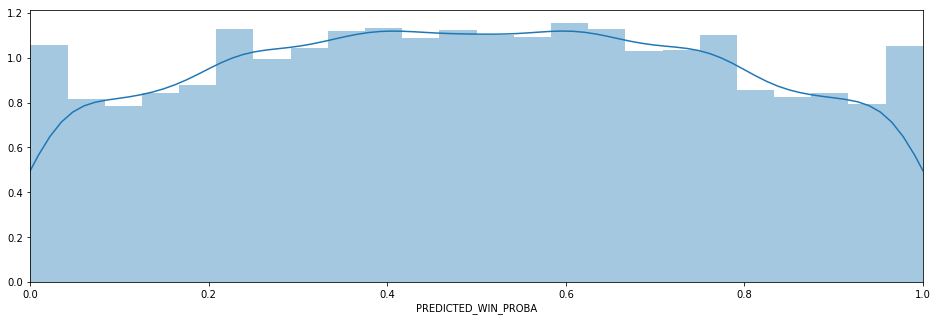

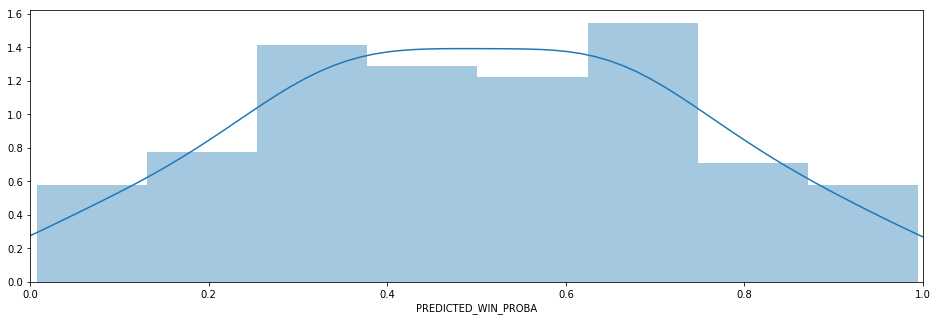

In [8]:
n_matches = df_test.shape[0]

def predict_proba(trace, team_id, team_opp_id, teams, n_trials=5000):
    team_ix = np.where(teams == team_id)[0][0]
    team_opp_ix = np.where(teams == team_opp_id)[0][0]
    
    team_fta_pred = trace['b_fta'][:, team_ix]
    team_fg2a_pred = trace['b_fg2a'][:, team_ix]
    team_fg3a_pred = trace['b_fg3a'][:, team_ix]
    team_ft_pct_pred = trace['b_ft_pct'][:, team_ix]
    team_fg2_pct_pred = trace['b_fg2_pct'][:, team_ix]
    team_fg3_pct_pred = trace['b_fg3_pct'][:, team_ix]
    
    team_opp_fta_pred = trace['b_fta'][:, team_opp_ix]
    team_opp_fg2a_pred = trace['b_fg2a'][:, team_opp_ix]
    team_opp_fg3a_pred = trace['b_fg3a'][:, team_opp_ix]
    team_opp_ft_pct_pred = trace['b_ft_pct'][:, team_opp_ix]
    team_opp_fg2_pct_pred = trace['b_fg2_pct'][:, team_opp_ix]
    team_opp_fg3_pct_pred = trace['b_fg3_pct'][:, team_opp_ix]
    
    # Simulate matches: how many times does the current team win against its opponent?
    team_fta_trials = np.random.choice(team_fta_pred, n_trials, replace=True)
    team_fg2a_trials = np.random.choice(team_fg2a_pred, n_trials, replace=True)
    team_fg3a_trials = np.random.choice(team_fg3a_pred, n_trials, replace=True)
    team_ft_pct_trials = np.random.choice(team_ft_pct_pred, n_trials, replace=True)
    team_fg2_pct_trials = np.random.choice(team_fg2_pct_pred, n_trials, replace=True)
    team_fg3_pct_trials = np.random.choice(team_fg3_pct_pred, n_trials, replace=True)
    
    team_opp_fta_trials = np.random.choice(team_opp_fta_pred, n_trials, replace=True)
    team_opp_fg2a_trials = np.random.choice(team_opp_fg2a_pred, n_trials, replace=True)
    team_opp_fg3a_trials = np.random.choice(team_opp_fg3a_pred, n_trials, replace=True)
    team_opp_ft_pct_trials = np.random.choice(team_opp_ft_pct_pred, n_trials, replace=True)
    team_opp_fg2_pct_trials = np.random.choice(team_opp_fg2_pct_pred, n_trials, replace=True)
    team_opp_fg3_pct_trials = np.random.choice(team_opp_fg3_pct_pred, n_trials, replace=True)
    
    team_trials = (team_fta_trials * team_ft_pct_trials) + \
        (team_fg2a_trials * team_fg2_pct_trials * 2) + \
        (team_fg3a_trials * team_fg3_pct_trials * 3)
    team_opp_trials = (team_opp_fta_trials * team_opp_ft_pct_trials) + \
        (team_opp_fg2a_trials * team_opp_fg2_pct_trials * 2) + \
        (team_opp_fg3a_trials * team_opp_fg3_pct_trials * 3)
    
    spreads = team_trials - team_opp_trials
    n_wins = np.where(spreads > 0)[0].shape[0]
    
    win_proba = n_wins / n_trials
    
    # Due to the log loss calculation which involves np.log(1 - win_proba)
    # and np.log(win_proba), we avoid np.log(0) by ever-so-slightly making 
    # 100% winning probabilities uncertain.
    win_proba = win_proba if win_proba < 1 else 0.999
    
    # We do the same for 0% winning probabilities.
    win_proba = win_proba if win_proba > 0 else 0.001
    
    return win_proba
    
# Calculate win probabilities, then calculate model log loss    
df = df_test.copy()
    
df['PREDICTED_WIN_PROBA'] = df.apply(
    lambda x: predict_proba(
        trace_pts_aggregate,
        x['TeamID'],
        x['TeamID_OPP'],
        teams
    ), axis=1
)

evaluate(df)

# Export odds

In [9]:
def generate_odds(df_ncaa_matches, trace, override_odds=True):
    df = df_ncaa_matches.copy()
    
    df['PREDICTED_WIN_PROBA'] = df.apply(
        lambda x: predict_proba(
            trace,
            x['TeamID'],
            x['TeamID_OPP'],
            teams
        ), axis=1
    )

    # Override odds for tournament matches for strong favourites (ie. high seed vs low seed)
    if override_odds:
        df.loc[
            lambda x: (x['Seed'].isin([1,2,3,4])) & (x['Seed_OPP'].isin([13,14,15,16])),
            'PREDICTED_WIN_PROBA'
        ] = 0.9999

        df.loc[
            lambda x: (x['Seed'].isin([13,14,15,16])) & (x['Seed_OPP'].isin([1,2,3,4])),
            'PREDICTED_WIN_PROBA'
        ] = 0.00001

    # Override match-specific odds 
    df.loc[
        lambda x: 
            #
            # Round of 16 overrides
            #

            # Notre Dame vs Marquette
            ((x['TeamID'] == 3323) & (x['TeamID_OPP'] == 3266)) |
            # Notre Dame vs Rice
            ((x['TeamID'] == 3323) & (x['TeamID_OPP'] == 3349)) |
            # Notre Dame vs Texas A&M
            ((x['TeamID'] == 3323) & (x['TeamID_OPP'] == 3401)) |
            # Notre Dame vs Wright State
            ((x['TeamID'] == 3323) & (x['TeamID_OPP'] == 3460)) |

            # Baylor vs Florida State
            ((x['TeamID'] == 3124) & (x['TeamID_OPP'] == 3199)) |
            # Baylor vs Bucknell
            ((x['TeamID'] == 3124) & (x['TeamID_OPP'] == 3137)) |
            # Baylor vs S Carolina
            ((x['TeamID'] == 3124) &( x['TeamID_OPP'] == 3376)) |
            # Baylor vs Belmont
            ((x['TeamID'] == 3124) & (x['TeamID_OPP'] == 3125)) |
            # Baylor vs California
            ((x['TeamID'] == 3124) & (x['TeamID_OPP'] == 3143)) |
            # Baylor vs UNC
            ((x['TeamID'] == 3124) & (x['TeamID_OPP'] == 3314)) |

            # Connecticut vs UCLA
            ((x['TeamID'] == 3163) & (x['TeamID_OPP'] == 3417)) |
            # Connecticut vs Tennesse
            ((x['TeamID'] == 3163) & (x['TeamID_OPP'] == 3397)) |
            # Connecticut vs Maryland
            ((x['TeamID'] == 3163) & (x['TeamID_OPP'] == 3268)) |
            # Connecticut vs Radford
            ((x['TeamID'] == 3163) & (x['TeamID_OPP'] == 3347)) |
            # Connecticut vs Rutgers
            ((x['TeamID'] == 3163) & (x['TeamID_OPP'] == 3353)) |

            # Mississippi State vs Arizona St.
            ((x['TeamID'] == 3280) & (x['TeamID_OPP'] == 3113)) |
            # Mississippi State vs UCF
            ((x['TeamID'] == 3280) & (x['TeamID_OPP'] == 3416)) |
            # Mississippi State vs Miami FL
            ((x['TeamID'] == 3280) & (x['TeamID_OPP'] == 3274)) |
            # Mississippi State vs FL Gulf Coast
            ((x['TeamID'] == 3280) & (x['TeamID_OPP'] == 3195)) |

            # Oregon vs S Dakota St
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3355)) |
            # Oregon vs Quinnipiac
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3346)) |
            # Oregon vs Syracuse
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3393)) |
            # Oregon vs Fordham
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3200)) |
            # Oregon vs Texas
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3400)) |

            # Louisville vs Michigan
            ((x['TeamID'] == 3332) & (x['TeamID_OPP'] == 3276)),
        'PREDICTED_WIN_PROBA'
    ] = 0.9999

    df.loc[
        lambda x: 
            #
            # Round of 16 overrides (reverse match ups, just to be sure)
            #

            # Marquette vs Notre Dame 
            ((x['TeamID'] == 3266) & (x['TeamID_OPP'] == 3323)) |
            # Rice vs Notre Dame
            ((x['TeamID'] == 3349) & (x['TeamID_OPP'] == 3323)) |
            # Texas A&M vs Notre Dame
            ((x['TeamID'] == 3401) & (x['TeamID_OPP'] == 3323)) |
            # Wright State vs Notre Dame 
            ((x['TeamID'] == 3460) & (x['TeamID_OPP'] == 3323)) |
            # Central Michigan vs Notre Dame
            ((x['TeamID'] == 3141) & (x['TeamID_OPP'] == 3323)) |
            # Michigan State vs Notre Dame
            ((x['TeamID'] == 3277) & (x['TeamID_OPP'] == 3323)) |

            # Florida State vs Baylor
            ((x['TeamID'] == 3199) & (x['TeamID_OPP'] == 3124)) |
            # Bucknell vs Baylor
            ((x['TeamID'] == 3137) & (x['TeamID_OPP'] == 3124)) |
            # S Carolina vs Baylor
            ((x['TeamID'] == 3376) & (x['TeamID_OPP'] == 3124)) |
            # Belmont vs Baylor
            ((x['TeamID'] == 3125) & (x['TeamID_OPP'] == 3124)) |

            # UCLA vs Connecticut
            ((x['TeamID'] == 3417) & (x['TeamID_OPP'] == 3163)) |
            # Tennesse vs Connecticut
            ((x['TeamID'] == 3397) & (x['TeamID_OPP'] == 3163)) |
            # Maryland vs Connecticut
            ((x['TeamID'] == 3268) & (x['TeamID_OPP'] == 3163)) |
            # Radford vs Connecticut
            ((x['TeamID'] == 3347) & (x['TeamID_OPP'] == 3163)) |
            # Buffalo vs Connecticut
            ((x['TeamID'] == 3138) & (x['TeamID_OPP'] == 3163)) |

            # Arizona St. vs Mississippi State
            ((x['TeamID'] == 3113) & (x['TeamID_OPP'] == 3280)) |
            # UCF vs Mississippi State
            ((x['TeamID'] == 3416) & (x['TeamID_OPP'] == 3280)) |
            # Miami FL vs Mississippi State
            ((x['TeamID'] == 3274) & (x['TeamID_OPP'] == 3280)) |
            # FL Gulf Coast vs Mississippi State
            ((x['TeamID'] == 3195) & (x['TeamID_OPP'] == 3280)) |

            # S Dakota St vs Oregon
            ((x['TeamID'] == 3355) & (x['TeamID_OPP'] == 3332)) |
            # Quinnipiac vs Oregon
            ((x['TeamID'] == 3346) & (x['TeamID_OPP'] == 3332)) |
            # Syracuse vs Oregon
            ((x['TeamID'] == 3393) & (x['TeamID_OPP'] == 3332)) |
            # Fordham vs Oregon
            ((x['TeamID'] == 3200) & (x['TeamID_OPP'] == 3332)) |
            # Indiana vs Oregon
            ((x['TeamID'] == 3200) & (x['TeamID_OPP'] == 3231)) |

            # Kansas St. vs Louisville
            ((x['TeamID'] == 3243) & (x['TeamID_OPP'] == 3257)),
        'PREDICTED_WIN_PROBA'
    ] = 0.00001
        
    return df

def export_odds(df_submission, df_tourney_seeds, df_teams, trace, out_path='odds.csv'):
    df_submission['TeamID'] = df_submission.apply(
        lambda x: x['ID'][5:9],
        axis=1
    )

    df_submission['TeamID_OPP'] = df_submission.apply(
        lambda x: x['ID'][-4:],
        axis=1
    )

    df_submission['TeamID'] = df_submission['TeamID'].astype(int)
    df_submission['TeamID_OPP'] = df_submission['TeamID_OPP'].astype(int)

    # Get team names
    df_submission = df_submission.merge(
        df_teams,
        on='TeamID',
        how='inner'
    ).merge(
        df_teams.rename(columns={
            'TeamID': 'TeamID_OPP',
            'TeamName': 'TeamName_OPP',
        }),
        on='TeamID_OPP',
        how='inner'
    )

    # Get current seeds
    df_tourney_seeds_current = df_tourney_seeds.loc[
        lambda x: x['Season'] == 2019
    ][[
        'Seed',
        'TeamID'
    ]]

    df_tourney_seeds_current['Division'] = df_tourney_seeds_current.apply(
        lambda x: x['Seed'][0],
        axis=1
    )
    
    df_tourney_seeds_current['Seed'] = df_tourney_seeds_current.apply(
        lambda x: int(x['Seed'][-2:]),
        axis=1
    )

    df_submission = df_submission.merge(
        df_tourney_seeds_current,
        on='TeamID',
        how='inner'
    ).merge(
        df_tourney_seeds_current.rename(columns={
            'TeamID': 'TeamID_OPP',
            'Seed': 'Seed_OPP',
            'Division': 'Division_OPP',
        }),
        on='TeamID_OPP',
        how='inner'
    )
    
    # Assign odds (including overriden odds) to each match
    df_probs_override = generate_odds(df_submission, trace)
    
    df_submission = df_submission.merge(
        df_probs_override[[
            'TeamID',
            'TeamID_OPP',
            'PREDICTED_WIN_PROBA'
        ]],
        on=['TeamID','TeamID_OPP'],
        how='inner'
    )

    df_submission['Pred'] = df_submission['PREDICTED_WIN_PROBA']
    
    df_submission.drop(
        'PREDICTED_WIN_PROBA',
        axis=1,
        inplace=True
    )
    
    # Export and return odds
    df_submission[[
        'ID',
        'Pred'
    ]].to_csv(out_path, index=False)
    
    df_submission.to_csv('odds_full.csv', index=False)
    
    print('Odds exported to [{}]'.format(out_path))
    
    return df_submission

df_odds = export_odds(df_submission, df_tourney_seeds, df_teams, trace_pts_aggregate)

Odds exported to [odds.csv]
